<a href="https://colab.research.google.com/github/rafaellima13/ml_car_prices/blob/main/Atividade_6_1_Classifica%C3%A7%C3%A3o_Bin%C3%A1ria_Atividade_05_Car_prices_Rafael_Lima_Bel%C3%A9m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rafaellima13/ml_car_prices/main/car-prices.csv'

dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [9]:
mapa = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_modelo',
    'price' : 'preco',
    'sold' : 'comprou'
}
dados = dados.rename(columns=mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,comprou
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [10]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.comprou = dados.comprou.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,comprou
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [11]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,comprou,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [12]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,comprou,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [13]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'], axis=1)
dados.head()

,preco,comprou,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


## Balanceamento

In [14]:
dados.comprou.value_counts()

comprou
1    5800
0    4200
Name: count, dtype: int64

# Classificação binária


*   CLASSES (Y) -> BOUGHT (1/0) -> CLASSIFICAÇÃO BINARIA
*   FEATURE NÃO DEFINE SE CLASSIFICAÇÃO É BINARIA



In [18]:
x = dados[["km_por_ano", "idade_do_modelo", "preco"]] #features
y = dados["comprou"] #classes

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
train_x = x[:75]
test_x = x[75:]
train_y = y[:75]
test_y = y[75:] #comparar com as previsões do modelo
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

Treinaremos com 75 elementos e testaremos com 9925 elementos
A acurácia foi 74.43%


# Separação do treino e teste

In [22]:
#SEPARAR TREINO E TESTE
seed = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state= seed, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


### MEU MODELO CLASSIFICADOR

---



In [21]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

A acurácia foi 74.43%


## COMPARAÇÃO DE ACURACIA DUMMY (BASELINE)

In [23]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier() #CRIA MODELO
dummy_stratified.fit(train_x, train_y) #TREINA MODELO
acuracia = dummy_stratified.score(test_x, test_y) * 100 #TESTE MODELO
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #IMPRIME RESULTADO

A acurácia do dummy stratified foi 57.52%


##VERIFICAÇÃO DE PROPORÇÃO DE TREINO E TESTE


In [24]:
dados['comprou'].value_counts()

comprou
1    5800
0    4200
Name: count, dtype: int64

In [25]:
train_y.value_counts() #classes

comprou
1    4362
0    3138
Name: count, dtype: int64

In [26]:
test_y.value_counts()

comprou
1    1438
0    1062
Name: count, dtype: int64

In [27]:
#SEPARAR TREINO E TESTE
seed = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state= seed, test_size = 0.25, stratify= y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


## MEU MODELO CLASSIFICADOR

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

A acurácia foi 76.48%


## COMPARAÇÃO DE ACURACIA DUMMY (BASELINE)

In [29]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier() #CRIA MODELO
dummy_stratified.fit(train_x, train_y) #TREINA MODELO
acuracia = dummy_stratified.score(test_x, test_y) * 100 #TESTE MODELO
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #IMPRIME RESULTADO

A acurácia do dummy stratified foi 58.00%


### USANDO O MODELO

In [30]:
model.predict([[21801,	2000,	30941.02]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

## Scaler

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = dados[["km_por_ano", "idade_do_modelo", "preco"]] #features
y = dados["comprou"] #classes

seed = 20
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify= y, random_state=seed)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x) # criando o normalizador treinando com raw
train_x = scaler.transform(raw_train_x) #treino x normalizado
test_x = scaler.transform(raw_test_x) #teste x normalizado

model = SVC(gamma="auto", random_state=seed) #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))



Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 75.92%


## Decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=3) #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

A acurácia foi 78.40%


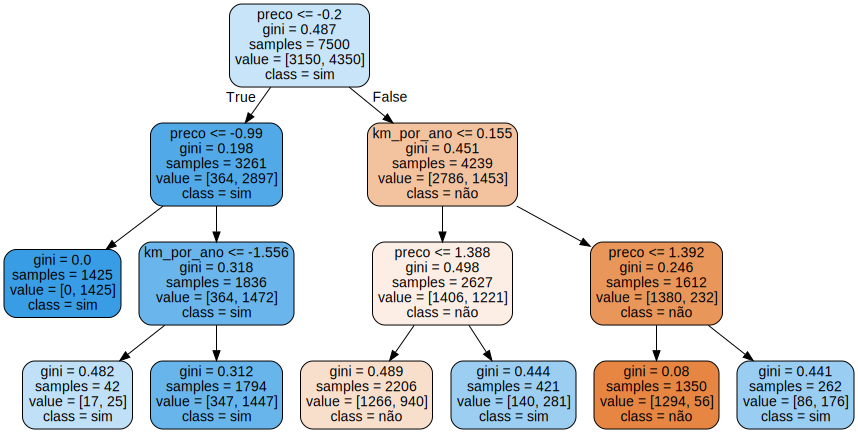

In [43]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=features, class_names=["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

In [52]:
carro = [21801, 3,	30941]
model.predict([carro])

array([1])